In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
path_to_file = '/content/drive/My Drive/album_ratings.csv'
source_df = pd.read_csv(path_to_file, engine='python')
source_df.dropna(inplace=True)
source_df.reset_index(inplace=True, drop=True)
del source_df["Artist"]
del source_df["Title"]
del source_df["Label"]

source_df


,Release Month,Release Day,Release Year,Format,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,March,3,2009,LP,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55
1,February,17,2009,LP,Country Rock,70.0,14.0,8.4,7.0,73,11,73,8
2,January,20,2009,LP,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335
3,January,27,2009,LP,Rock,72.0,29.0,7.9,101.0,70,23,66,38
4,January,20,2009,LP,Singer-Songwriter,79.0,29.0,8.7,47.0,74,24,78,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7937,October,13,2017,LP,Pop Rock,81.0,6.0,5.6,29.0,80,4,76,4
7938,May,12,2012,LP,Metalcore,81.0,6.0,8.8,4.0,75,2,70,1
7939,June,25,2013,LP,Electro House,73.0,5.0,8.4,7.0,74,4,71,2
7940,September,24,2002,LP,Microhouse,60.0,10.0,7.0,4.0,70,2,90,1


In [7]:
from sklearn.preprocessing import LabelEncoder
import sklearn
def code_categories(data: pd.DataFrame, method: str, columns: list) -> (pd.DataFrame, dict):
  data = data.dropna()
  data.reset_index(inplace=True, drop=True)
  d_data = data.copy()
  encoder_dict = dict()
  if method == 'label':
    for column in columns:
      le = sklearn.preprocessing.LabelEncoder()
      d_data[column] = le.fit_transform(d_data[column].values)
      mapping = dict(zip(le.classes_, range(len(le.classes_))))
      encoder_dict[column] = mapping
  elif method == 'onehot':
    d_data = pd.get_dummies(d_data, columns=columns)
  return d_data, encoder_dict

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

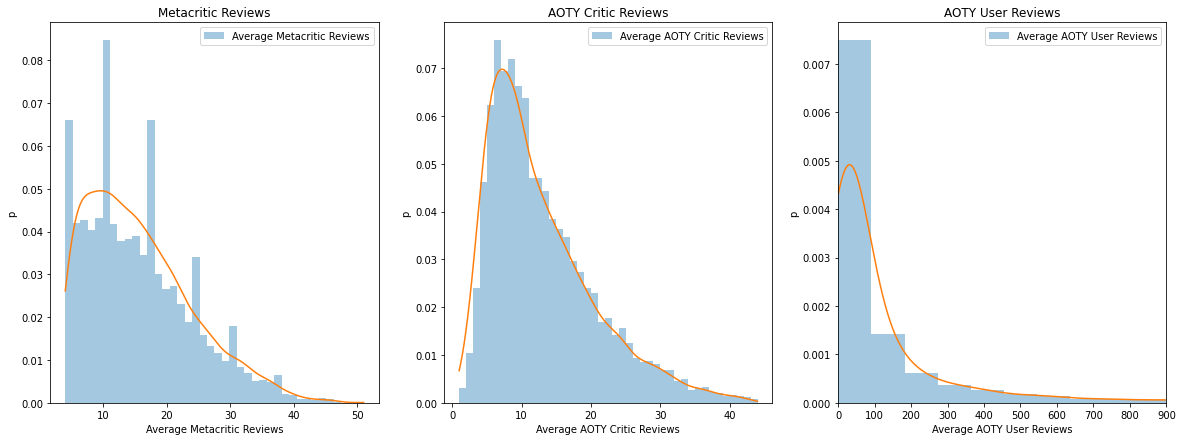

In [8]:
#Step 2:A non-parametric estimation of PDF in form of histogram and using kernel density function (or probability law in case of discrete RV)
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
kernel = scipy.stats.gaussian_kde(source_df['Metacritic Reviews'])

min_amount, max_amount = source_df['Metacritic Reviews'].min(), source_df['Metacritic Reviews'].max()
x = np.linspace(min_amount, max_amount, len(source_df))
kde_values1 = kernel(x)

sns.distplot(source_df['Metacritic Reviews'], kde=False, norm_hist=True, label=f'Average Metacritic Reviews')
plt.title('Metacritic Reviews')

plt.plot(x, kde_values1)

plt.ylabel('p')
plt.xlabel('Average Metacritic Reviews')
plt.legend()

plt.subplot(1, 3, 2)
kernel = scipy.stats.gaussian_kde(source_df['AOTY Critic Reviews'])

min_amount, max_amount = source_df['AOTY Critic Reviews'].min(), source_df['AOTY Critic Reviews'].max()
x = np.linspace(min_amount, max_amount, len(source_df))
kde_values2 = kernel(x)

sns.distplot(source_df['AOTY Critic Reviews'], kde=False, norm_hist=True, label=f'Average AOTY Critic Reviews')
plt.title('AOTY Critic Reviews')
plt.plot(x, kde_values2)
plt.ylabel('p')
plt.xlabel('Average AOTY Critic Reviews')
plt.legend()
# plt.xlim(0, 500)

plt.subplot(1, 3, 3)
kernel = scipy.stats.gaussian_kde(source_df['AOTY User Reviews'])

min_amount, max_amount = source_df['AOTY User Reviews'].min(), source_df['AOTY User Reviews'].max()
x = np.linspace(min_amount, max_amount, len(source_df))
kde_values3 = kernel(x)

sns.distplot(source_df['AOTY User Reviews'], kde=False, norm_hist=True, label=f'Average AOTY User Reviews')
plt.title('AOTY User Reviews')
plt.plot(x, kde_values3)
plt.ylabel('p')
plt.xlabel('Average AOTY User Reviews')
plt.legend()
plt.xlim(0, 900)

plt.show()

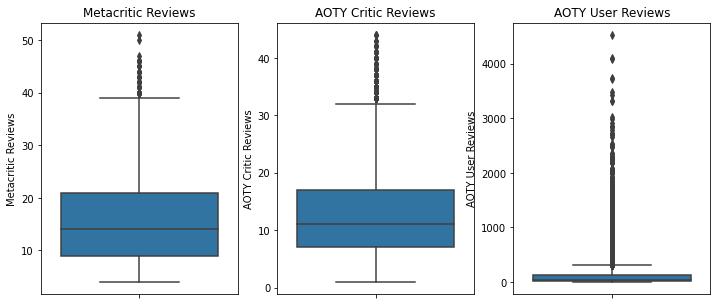

In [9]:
# Step 3: estimation of order statistics with 'box with whiskers plot'
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title('Metacritic Reviews')
sns.boxplot(y=source_df['Metacritic Reviews'])

plt.subplot(1, 3, 2)
plt.title('AOTY Critic Reviews')
sns.boxplot(y=source_df['AOTY Critic Reviews'])

plt.subplot(1, 3, 3)
plt.title('AOTY User Reviews')
sns.boxplot(y=source_df['AOTY User Reviews'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

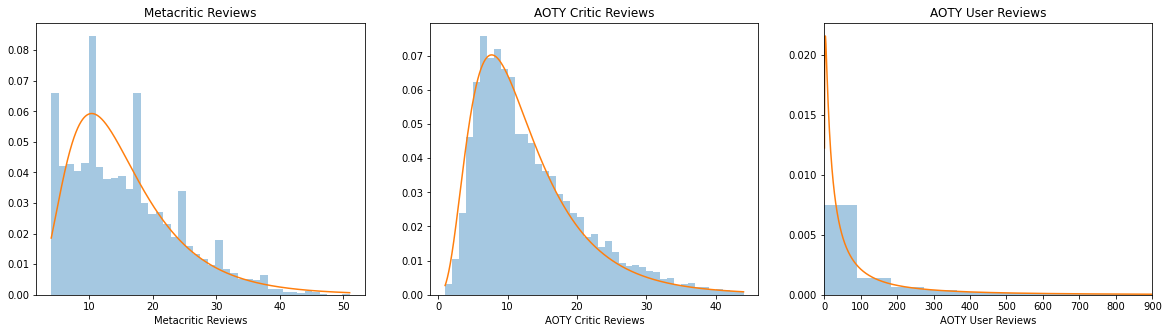

In [10]:
# Step 4: one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results
plt.figure(figsize=(20, 5))
min_amount, max_amount = source_df['Metacritic Reviews'].min(), source_df['Metacritic Reviews'].max()
x = np.linspace(min_amount, max_amount, len(source_df))

params = scipy.stats.lognorm.fit(source_df['Metacritic Reviews'])
pdf = scipy.stats.lognorm.pdf(x, *params)
plt.subplot(1, 3, 1)
plt.title('Metacritic Reviews')

sns.distplot(source_df['Metacritic Reviews'], kde=False, norm_hist=True, label=f'Average Metacritic Reviews')

plt.plot(x, pdf)


min_amount2, max_amount2 = source_df['AOTY Critic Reviews'].min(), source_df['AOTY Critic Reviews'].max()
x = np.linspace(min_amount2, max_amount2, len(source_df))

params = scipy.stats.lognorm.fit(source_df['AOTY Critic Reviews'])
pdf = scipy.stats.lognorm.pdf(x, *params)
plt.subplot(1, 3, 2)
plt.title('AOTY Critic Reviews')

sns.distplot(source_df['AOTY Critic Reviews'], kde=False, norm_hist=True, label=f'Average AOTY Critic Reviews')

plt.plot(x, pdf)

min_amount3, max_amount3 = source_df['AOTY User Reviews'].min(), source_df['AOTY User Reviews'].max()
x = np.linspace(min_amount3, max_amount3, len(source_df))

params = scipy.stats.lognorm.fit(source_df['AOTY User Reviews'])
pdf = scipy.stats.lognorm.pdf(x, *params)
plt.subplot(1, 3, 3)
plt.title('AOTY User Reviews')

sns.distplot(source_df['AOTY User Reviews'], kde=False, norm_hist=True, label=f'Average AOTY User Reviews')

plt.plot(x, pdf)
plt.xlim(0, 900)

plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

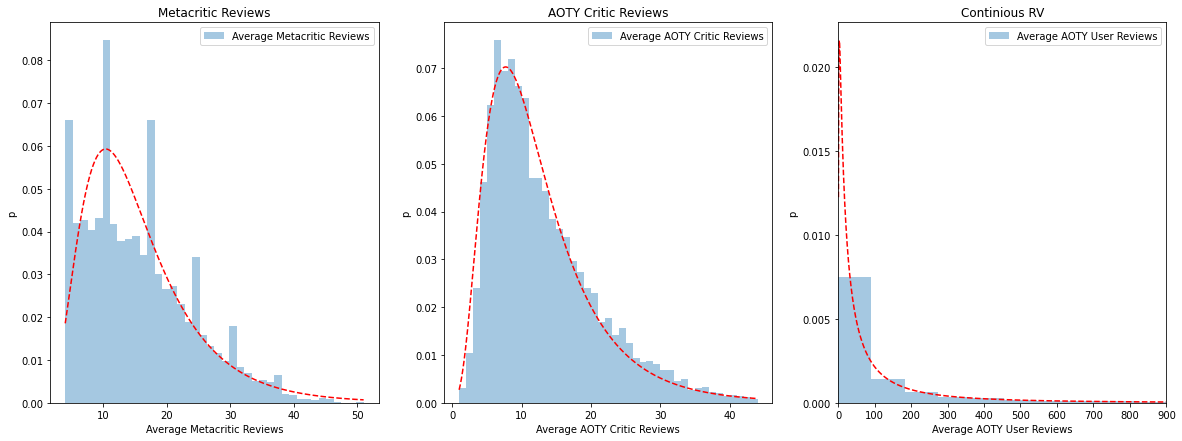

In [11]:
# Step 5
# The distribution parameters are determined using the fit function based on the maximum likelihood method
plt.figure(figsize=(20, 7))
min_amount, max_amount = source_df['Metacritic Reviews'].min(), source_df['Metacritic Reviews'].max()
x = np.linspace(min_amount, max_amount, len(source_df))

params1 = scipy.stats.lognorm.fit(source_df['Metacritic Reviews'])
pdf = scipy.stats.lognorm.pdf(x, *params1)
plt.subplot(1, 3, 1)
plt.title('Metacritic Reviews')

sns.distplot(source_df['Metacritic Reviews'], kde=False, norm_hist=True, label=f'Average Metacritic Reviews')

moms = scipy.stats.lognorm.fit(source_df['Metacritic Reviews'])

plt.plot(x, scipy.stats.lognorm.pdf(x, moms[0], moms[1], moms[2]), 'r--')
plt.ylabel('p')
plt.xlabel('Average Metacritic Reviews')
plt.legend()

min_amount2, max_amount2 = source_df['AOTY Critic Reviews'].min(), source_df['AOTY Critic Reviews'].max()
x = np.linspace(min_amount2, max_amount2, len(source_df))

params1 = scipy.stats.lognorm.fit(source_df['AOTY Critic Reviews'])
pdf = scipy.stats.lognorm.pdf(x, *params1)
plt.subplot(1, 3, 2)
plt.title('AOTY Critic Reviews')

sns.distplot(source_df['AOTY Critic Reviews'], kde=False, norm_hist=True, label=f'Average AOTY Critic Reviews')

moms = scipy.stats.lognorm.fit(source_df['AOTY Critic Reviews'])

plt.plot(x, scipy.stats.lognorm.pdf(x, moms[0], moms[1], moms[2]), 'r--')
plt.ylabel('p')
plt.xlabel('Average AOTY Critic Reviews')
plt.legend()

min_amount3, max_amount3 = source_df['AOTY User Reviews'].min(), source_df['AOTY User Reviews'].max()
x = np.linspace(min_amount3, max_amount3, len(source_df))

params1 = scipy.stats.lognorm.fit(source_df['AOTY User Reviews'])
pdf = scipy.stats.lognorm.pdf(x, *params1)
plt.subplot(1, 3, 3)
plt.title('Continious RV')

sns.distplot(source_df['AOTY User Reviews'], kde=False, norm_hist=True, label=f'Average AOTY User Reviews')

moms = scipy.stats.lognorm.fit(source_df['AOTY User Reviews'])

plt.plot(x, scipy.stats.lognorm.pdf(x, moms[0], moms[1], moms[2]), 'r--')
plt.ylabel('p')
plt.xlabel('Average AOTY User Reviews')
plt.legend()
plt.xlim(0, 900)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

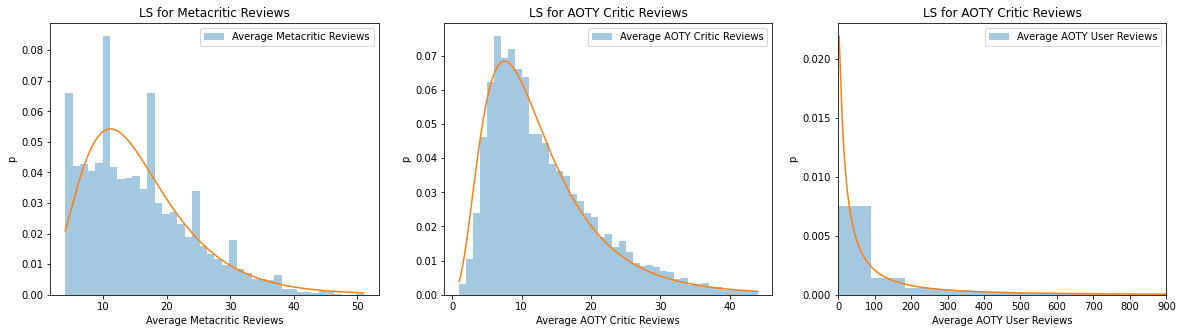

In [12]:
# Least squares 
from scipy.optimize import least_squares

q = np.linspace(0.01, 0.95)
quantiles_true = np.quantile(source_df['Metacritic Reviews'], q)

def loss_for_least_squares(params):
    global quantiles_true, q
    quantiles_approx = scipy.stats.lognorm.ppf(q, *params)
    return quantiles_true - quantiles_approx

min_amount, max_amount = source_df['Metacritic Reviews'].min(), source_df['Metacritic Reviews'].max()
x = np.linspace(min_amount, max_amount, len(source_df))

args_ls1 = least_squares(loss_for_least_squares, (1.0, 1.0, 1.0))['x']
pdf_ls2 = scipy.stats.lognorm.pdf(x, *args_ls1)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title('LS for Metacritic Reviews')

sns.distplot(source_df['Metacritic Reviews'], kde=False, norm_hist=True, label=f'Average Metacritic Reviews')
plt.plot(x, pdf_ls2)

plt.ylabel('p')
plt.xlabel('Average Metacritic Reviews')
plt.legend()


min_amount2, max_amount2 = source_df['AOTY Critic Reviews'].min(), source_df['AOTY Critic Reviews'].max()
x = np.linspace(min_amount2, max_amount2, len(source_df))

quantiles_true2 = np.quantile(source_df['AOTY Critic Reviews'], q)

def loss_for_least_squares2(params):
    global quantiles_true2, q
    quantiles_approx = scipy.stats.lognorm.ppf(q, *params)
    return quantiles_true2 - quantiles_approx

args_ls2 = least_squares(loss_for_least_squares2, (1.0, 1.0, 1.0))['x']
pdf_ls2 = scipy.stats.lognorm.pdf(x, *args_ls2)

plt.subplot(1, 3, 2)
plt.title('LS for AOTY Critic Reviews')

sns.distplot(source_df['AOTY Critic Reviews'], kde=False, norm_hist=True, label=f'Average AOTY Critic Reviews')

plt.plot(x, pdf_ls2)

plt.ylabel('p')
plt.xlabel('Average AOTY Critic Reviews')
plt.legend()



min_amount3, max_amount3 = source_df['AOTY User Reviews'].min(), source_df['AOTY User Reviews'].max()
x = np.linspace(min_amount3, max_amount3, len(source_df))

quantiles_true3 = np.quantile(source_df['AOTY User Reviews'], q)

def loss_for_least_squares3(params):
    global quantiles_true3, q
    quantiles_approx = scipy.stats.lognorm.ppf(q, *params)
    return quantiles_true3 - quantiles_approx

args_ls3 = least_squares(loss_for_least_squares3, (1.0, 1.0, 1.0))['x']
pdf_ls3 = scipy.stats.lognorm.pdf(x, *args_ls3)

plt.subplot(1, 3, 3)
plt.title('LS for AOTY Critic Reviews')

sns.distplot(source_df['AOTY User Reviews'], kde=False, norm_hist=True, label=f'Average AOTY User Reviews')

plt.plot(x, pdf_ls3)

plt.ylabel('p')
plt.xlabel('Average AOTY User Reviews')
plt.legend()
plt.xlim(0, 900)

plt.show()

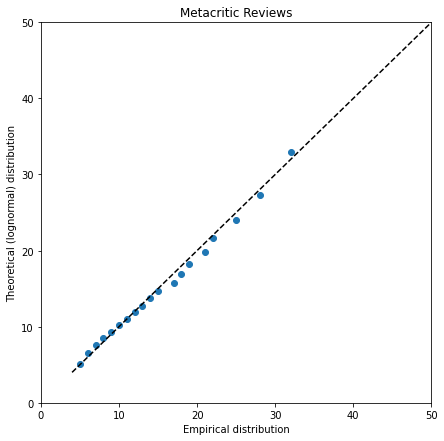

In [13]:
# Step 6: QQ Plot
from math import sqrt

x = np.linspace(np.min(source_df['Metacritic Reviews']), np.max(source_df['Metacritic Reviews']))
params = scipy.stats.lognorm.fit(source_df['Metacritic Reviews'])
pdf = scipy.stats.lognorm.pdf(x, *params)

percs = np.linspace(0, 100, 21)
qn_first = np.percentile(source_df['Metacritic Reviews'], percs)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params)


# Building a quantile biplot
plt.figure(figsize=(7, 7))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (lognormal) distribution')
plt.title('Metacritic Reviews')
plt.show()


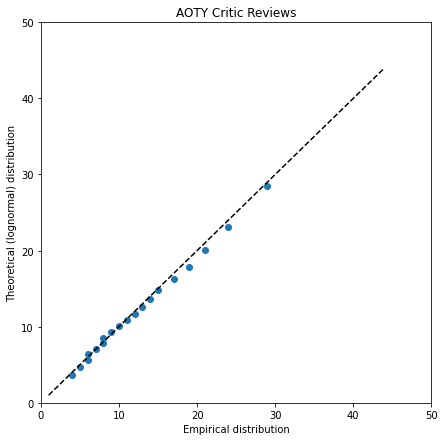

In [14]:

x = np.linspace(np.min(source_df['AOTY Critic Reviews']), np.max(source_df['AOTY Critic Reviews']))
params = scipy.stats.lognorm.fit(source_df['AOTY Critic Reviews'])
pdf = scipy.stats.lognorm.pdf(x, *params)

percs = np.linspace(0, 100, 21)
qn_first = np.percentile(source_df['AOTY Critic Reviews'], percs)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params)


# Building a quantile biplot
plt.figure(figsize=(7, 7))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (lognormal) distribution')
plt.title('AOTY Critic Reviews')
plt.show()

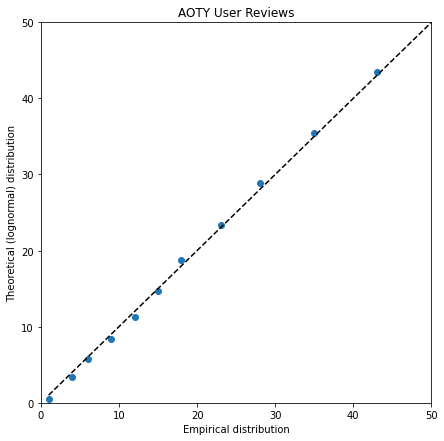

In [15]:
x = np.linspace(np.min(source_df['AOTY User Reviews']), np.max(source_df['AOTY User Reviews']))
params = scipy.stats.lognorm.fit(source_df['AOTY User Reviews'])
pdf = scipy.stats.lognorm.pdf(x, *params)

percs = np.linspace(0, 100, 21)
qn_first = np.percentile(source_df['AOTY User Reviews'], percs)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params)


# Building a quantile biplot
plt.figure(figsize=(7, 7))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (lognormal) distribution')
plt.title('AOTY User Reviews')
plt.show()

In [16]:
# Step 7:
# Calculation of the Kolmogorov-Smirnov test and chi-square
params = scipy.stats.lognorm.fit(source_df['Metacritic Reviews'])
ks = scipy.stats.kstest(source_df['Metacritic Reviews'], 'lognorm', params, N=100)
chi2 = scipy.stats.chisquare(source_df['Metacritic Reviews'])
print('Metacritic Reviews statistical tests')
print(ks)
print(chi2)

params = scipy.stats.lognorm.fit(source_df['AOTY Critic Reviews'])
ks = scipy.stats.kstest(source_df['AOTY Critic Reviews'], 'lognorm', params, N=100)
chi2 = scipy.stats.chisquare(source_df['AOTY Critic Reviews'])
print('AOTY Critic Reviews statistical tests')
print(ks)
print(chi2)

params = scipy.stats.lognorm.fit(source_df['AOTY User Reviews'])
ks = scipy.stats.kstest(source_df['AOTY User Reviews'], 'lognorm', params, N=100)
chi2 = scipy.stats.chisquare(source_df['AOTY User Reviews'])
print('AOTY User Reviews')
print(ks)
print(chi2)

Metacritic Reviews statistical tests
KstestResult(statistic=0.05399181694602917, pvalue=1.5544810760290804e-20)
Power_divergenceResult(statistic=35503.602332211245, pvalue=0.0)
AOTY Critic Reviews statistical tests
KstestResult(statistic=0.050676700338609715, pvalue=3.847926308956878e-18)
Power_divergenceResult(statistic=37513.55665783961, pvalue=0.0)
AOTY User Reviews
KstestResult(statistic=0.01895018608581063, pvalue=0.0066645756798259315)
Power_divergenceResult(statistic=5341664.231944493, pvalue=0.0)
